<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Orb_TTV_Lightcurve_230924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

#Orbital Simulations
######Using a Monte Carlo (repeating a function $N$ amount of times) and randomising the angle at which a moon is observed around a planet - known as realisation.

In [381]:
def barycentre(Mp, Mm, dpm, moon_period):
  dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
  dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON
  print(f'Planet-barycentre distance = {dp:.3f}\nMoon-barycentre distance = {dm:.3f}')
  return(dp, dm)

In [382]:
# PARAMETERS
Mp = 1*const.M_earth
Mm = 0.0123*const.M_earth
dpm = 0.3844e9*u.m
moon_period = 27.322*u.day
P = 1*u.year
P = P.to(u.day)

dp, dm = barycentre(Mp, Mm, dpm, moon_period)

Planet-barycentre distance = 4670670.750 m
Moon-barycentre distance = 379729329.250 m


In [383]:
t = np.linspace(0, 2*P, 1000)

N = 1 # NUMBER OF ANGLES

angle = []
def position(N):
  for i in range(N):
    angle.append(np.random.uniform(0, 2*np.pi)*u.rad)
    #print(f"Start angle #{i+1} = {angle[i]:.3f}") # IF WE WANT TO PRINT THE LIST OF ALL STARTING ANGLES OF 'N' REALISATIONS

    # BARYCENTRE
    ab = 1*const.au # SEPARATION
    Pb = P.to(u.s)  # PERIOD
    wb = (2*np.pi/Pb) *u.rad # ANGULAR FREQ
    alphab = wb*t
    xb = ab*np.sin(alphab)

    # PLANET
    wp = 2*np.pi/moon_period *u.rad
    alphap = wp*t + angle[i]
    xp = dp * np.sin(alphap) + xb

    # MOON
    wm = 2*np.pi/moon_period *u.rad
    alpham = wm*t + np.pi*u.rad + angle[i]
    xm = dm*np.sin(alpham) + xb

    '''
    plt.figure(figsize=(17, 6))
    plt.subplot(2, 2, 1)
    plt.plot(t/P, xb/ab.to(u.m), label = f'Barycentre')
    plt.plot(t/P, xp/ab.to(u.m), label = f'Planet')
    plt.plot(t/P, xm/ab.to(u.m), label = f'Moon')
    plt.legend()
    plt.title(f'Orbital simulations for barycentre, planet and\nmoon with starting angle for planet: {alphap[i].to(u.deg):.0f}')
    plt.grid(True)
    plt.xlabel('Time (years)')
    plt.ylabel('Distance from line of sight (AU)')
    plt.tight_layout()

    # TEST TO SEE IF THE ANGLES ARE RANDOMISED
    a = alphap[i]-alpham[i]
    print(f'{a}')
    '''
  return angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham


angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham = position(N)
print('Done')

Done


#TTV calculations
######Using the previous values of angles to calculate the TTVs for moon and planet

1/1 - The first transit TTV for planet and moon:
Planet TTV = 139.441 s
Moon TTV = -11336.659 s


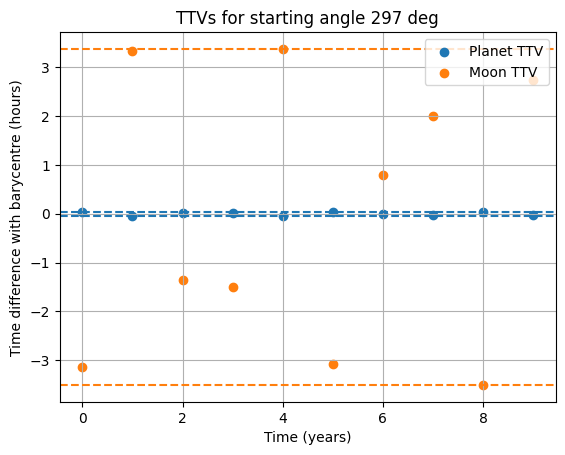

In [384]:
num_of_tran = 10 # NUMBER OF TRANSITS
t = np.arange(0,num_of_tran*P.value,P.value)*P.unit # TIME

ttvp = []
ttvm = []
for angles in angle:
  # BARYCENTRE
  alphab = wb*t
  xb = ab*np.sin(alphab)
  # PLANET
  wp = 2*np.pi/moon_period *u.rad
  alphap = wp*t + angles # USING THE ANGLE FROM THE PREVIOUS CELL
  xp = dp * np.sin(alphap) + xb
  # MOON
  wm = 2*np.pi/moon_period *u.rad
  alpham = wm*t + np.pi*u.rad + angles
  xm = dm*np.sin(alpham) + xb


  diffp = xb - xp
  diffm = xb - xm

  vb = (2*np.pi*ab)/P.to(u.s) # BARYCENTRE VELOCITY
  #print(f'Velocity of system around star = {vb:.3f}')

  ttvp.append(diffp/vb)
  ttvm.append(diffm/vb)

for i in range(N):
  print(f'{(i+1)}/{N} - The first transit TTV for planet and moon:')
  print(f'Planet TTV = {ttvp[i][0]:.3f}\nMoon TTV = {ttvm[i][0]:.3f}')

  plt.figure()
  plt.scatter(t/P, ttvp[i].to(u.h), label = 'Planet TTV')
  maxp = np.max(ttvp[i]).to(u.h)
  minp = np.min(ttvp[i]).to(u.h)

  plt.scatter(t/P, ttvm[i].to(u.h), label = 'Moon TTV')
  maxm = np.max(ttvm[i]).to(u.h)
  minm = np.min(ttvm[i]).to(u.h)

  plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
  plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

  plt.title(f'TTVs for starting angle {angle[i].to(u.deg):.0f}')
  plt.xlabel('Time (years)')
  plt.ylabel('Time difference with barycentre (hours)')
  plt.grid()
  plt.legend()
  plt.show()

In [385]:
for i in range(len(ttvp)):
  print(f'TTV list for planets for {i+1} random starting angles:\n{ttvp[i]}')
  print(f'TTV list for moons for {i+1} random starting angles:\n{ttvm[i]}\n')

TTV list for planets for 1 random starting angles:
[ 139.44090299 -147.19394889   59.84295729   66.17339316 -149.43420296
  136.14351626  -34.88862876  -88.90828226  155.26032768 -121.29653718] s
TTV list for moons for 1 random starting angles:
[-11336.65877936  11966.98771448  -4865.28108055  -5379.95066311
  12149.12219183 -11068.57855736   2836.47388294   7228.31563054
 -12622.79086836   9861.50708782] s



#Light Curve Simulations

In [ ]:
!pip install pytransit celerite emcee corner
from pytransit import QuadraticModel
from scipy.optimize import minimize

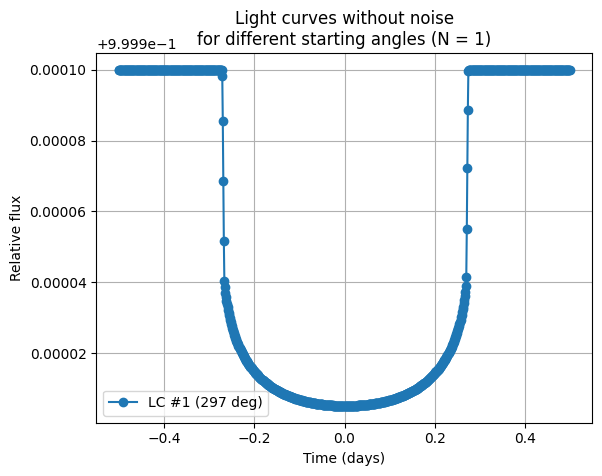

In [386]:
ttvp = np.array(ttvp)*u.s # USING THE FIRST TTV CALCULATIONS FROM THE FIRST RANDOM STARTING ANGLE
ttvp = ttvp.to(u.day)

# SWAPPED THE t0 FOR ttvp FOR THE TIME OF INFERIOR CONJUNCTION IN DAYS TO RUN IN A LOOP TO GET MULTIPLE LIGHT CURVES
per = 365.25                               #orbital period in days
rp_rs = (1*const.R_earth)/(1*const.R_sun)      #planet radius / stellar radius ratio
ars =  (1*const.au)/(1*const.R_sun)              #semi-major axis / stellar radius ratio
inc =  (90*u.deg).to(u.rad).value    #orbital inclination (in radians)
ecc = 0.                             #eccentricity
w = (90*u.deg).to(u.rad).value       #longitude of periastron (in radians)
gamma = [0.231, 0.226]               #limb darkening coefficients [u1, u2]

texp = 100*u.s.to(u.day)             # the exposure time : we convert seconds to days
t = np.arange(-0.5, 0.5, texp)       # new timegrid #note we use np.arange rather than np.linspace (DAYS) MANDEL AND........
tm = QuadraticModel()                # a model that uses two limb-darkening coefficients
tm.set_data(t)

lc = []
if N <= 10: # PREVENTS PLOTTING OF OVER 10 LIGHT CURVES ON ONE GRAPH TO SAVE RESOURCES
  for i in range(len(ttvp)):
    lc.append(tm.evaluate(k=rp_rs, ldc=gamma, t0=ttvp[i][0], p=per, a=ars, i=inc, e=ecc, w=w))
    plt.plot(t, lc[i], '-o', label = f'LC #{i+1} ({angle[i].to(u.deg):.0f})')

    plt.title(f'Light curves without noise\nfor different starting angles (N = {N})')
    plt.xlabel('Time (days)')
    plt.ylabel('Relative flux')
    plt.legend()
    plt.grid(True)
  plt.show()
else:
    print('Too many light curves to show but has ran correctly')

In [387]:
def planck(wl, T):
  a = np.float64(1.191042768e8)*u.um**5 *u.W/ u.m**2 /u.sr/u.um
  b = np.float64(14387.7516)*1*u.um * 1*u.K
  try:
    x = b/(wl*T)
    bb = a/wl**5 / (np.exp(x) - 1.0)
  except ArithmeticError:
    bb = np.zeros(np.size(wl))
  return bb

s_lum, s_rad = 1*const.L_sun, 1*const.R_sun              # STELLAR VALUES
T_s = (s_lum/(4*np.pi*s_rad**2*const.sigma_sb))**0.25    # TEMP-LUMINOSITY RELATIONSHIP

wl = np.linspace(0.6, 5.3, 1000)*u.um                    # JWST NIRSPEC PRISM WAVELENGTH RANGE
wl_full = np.linspace(0,6, 1000)*u.um
BB_flux = np.pi*u.sr*planck(wl,T_s)                      # FLUX DENSITY - W/M^2/MICRONS
BB_flux_full = np.pi*u.sr*planck(wl_full,T_s)
'''
plt.figure('BB flux of host star')
plt.figure(figsize=(12, 6))
plt.plot(wl_full,BB_flux_full,'--', label = 'BB flux of star')
plt.plot(wl,BB_flux,label = 'BB flux in JWST range')
plt.title(f'Blackbody radiation flux for star with T = {T_s:.0f} and observation range')
plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux (W/m$^2$/$\mu m$)')
plt.legend()
plt.grid()
plt.show();
'''
print('Done')

Done


/usr/local/lib/python3.10/dist-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


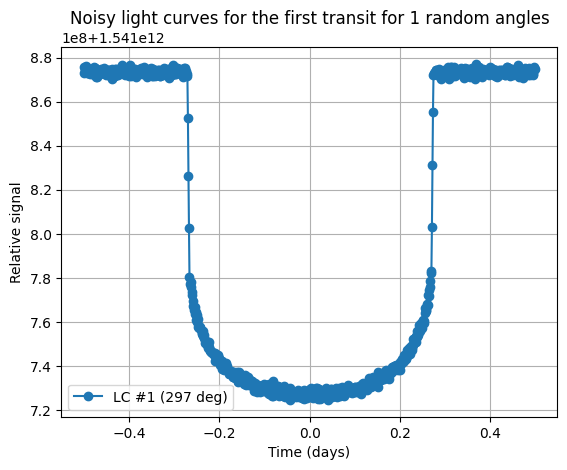

In [388]:
R_s = 1*u.Rsun.to(u.m) # host star radius in Rsun (code converts this to m)
d = 10*u.pc.to(u.m) # distance to star in pc (code converts this to m)

Flux = BB_flux*(R_s/d)**2

D = 6.5*u.m; Atel = np.pi*(D/2)**2 # APERTURE OF SPECIFIC TELESCOPE
trans = 0.5; QE = 0.8 # QUANTUM EFFICIENCY
Power_per_micron = Flux*Atel*trans*QE # WATTS / MICRON
Power = Power_per_micron*np.gradient(wl) # WATTS

Photons_per_second = Power/(const.h*const.c/wl.to(u.m)) # CONVERT WATTS TO PHOTONS
Photons_per_second = np.sum(Photons_per_second).value*1/u.s # TOTAL ELECTRONS PER SECOND

exposure_time = 100*u.s # GENRALISED EXPOSURE
Electrons = (Photons_per_second*exposure_time).value
std = np.abs(Electrons**0.5) # ASSUMING A NOISE LIMITED INSTRUMENT

#Noise = np.abs(Electrons**0.5) # USED THE STD RATHER THAN Noise VARIABLE

# LIST OF NEW LIGHT CURVES
lc_new = []

if N <= 10: # PREVENTS PLOTTING OF OVER 10 LIGHT CURVES ON ONE GRAPH TO SAVE RESOURCES
  for i in range(len(lc)):
    temp_lc = lc[i]*Electrons
    Noise = np.random.normal(0, std, len(lc[i]))
    temp_lc = temp_lc + Noise
    lc_new.append(temp_lc)
    plt.plot(t, temp_lc, '-o', alpha = 1/(i+1), label = f'LC #{i+1} ({angle[i].to(u.deg):.0f})')
    plt.grid()
    plt.title(f'Noisy light curves for the first transit for {N} random angles')
    plt.ylabel('Relative signal')
    plt.xlabel('Time (days)')
    plt.legend()
  plt.show()
else:
  print('Too many light curves but has executed correctly')

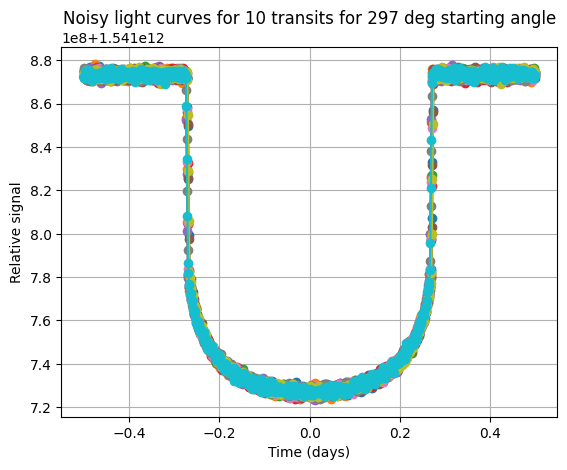

In [389]:
import matplotlib.pyplot as plt
import numpy as np

lc_new = []

for i in range(len(ttvp)):
  for j in range(len(ttvp[i])):
    tm = QuadraticModel()
    tm.set_data(t)
    lc.append(tm.evaluate(k=rp_rs, ldc=gamma, t0=ttvp[i][j], p=per, a=ars, i=inc, e=ecc, w=w))
    temp_lc = lc[-1]*Electrons
    Noise = np.random.normal(0, std, len(lc[-1]))
    temp_lc = temp_lc + Noise
    lc_new.append(temp_lc)
    plt.plot(t, temp_lc, '-o', alpha = 1/(i+1), label = f'Tran #{j+1}')

    plt.grid()
    plt.title(f'Noisy light curves for {num_of_tran} transits for {angle[i].to(u.deg):.0f} starting angle')
    plt.ylabel('Relative signal')
    plt.xlabel('Time (days)')
    if num_of_tran <=2:
      plt.legend()
    plt.grid(True)
  plt.show()

In [390]:
for i in range(len(ttvp)):
  stdttvp = np.std(ttvp[i])

  print(f"TTV list for random angle {i+1}:")
  print(f'{ttvp[i]}\nStandard deviation = {stdttvp.to(u.s)}')

TTV list for random angle 1:
[ 0.0016139  -0.00170363  0.00069263  0.0007659  -0.00172956  0.00157574
 -0.0004038  -0.00102903  0.00179699 -0.0014039 ] d
Standard deviation = 117.41088427505055 s


In [392]:
def chi_squared(X, lc, Noise):
    rp_rs = X[0]
    S = X[1]
    t_0 = X[2]
    model =tm.evaluate(k=rp_rs, ldc=gamma, t0=t_0, p=per, a=ars, i=inc, e=ecc, w=w) *S
    return np.sum(((model-lc))**2/Noise**2)

t0 = ttvp
data_lc = lc
S= Electrons

fit_init = [((lc_new.max()-lc_new.min())/ lc_new.max())**0.5, np.mean(lc_new[0:40]), t0.value[0]+np.random.normal(0,0.001)] # these are initial guesses - we'll cheat a bit by putting in the known values but you can try starting with different initial values too
# Access the first element of t0.value to ensure it's a scalar
bounds =((rp_rs*0.99,rp_rs*1.1), (S*0.99,S*1.1), (-0.01,0.01)) # the bounds over which the algorithm will vary the parameters
# Use std instead of Noise
fit  = minimize(chi_squared, fit_init, args=(data_lc, std), method='Nelder-Mead', jac=None, hess=None, hessp=None, bounds=bounds, constraints=(), tol=None, callback=None, options=None)
final_fit = [fit['x'][0], fit['x'][1], fit['x'][2]]
print ('Fitted Rp/Rs', final_fit[0], 'Actual Rp/Rs', rp_rs)
print ('Fitted S', final_fit[1], 'Actual S', S)
print ('Fitted t0', final_fit[2], 'Actual t0', t0)

model_fit = tm.evaluate(k=fit['x'][0], ldc=gamma, t0=fit['x'][2], p=per, a=ars, i=inc, e=ecc, w=w) *fit['x'][1]

plt.figure('lc')
plt.plot(t,data_lc, 'o')
plt.plot(t,model_fit, '-')
plt.show();

AttributeError: 'list' object has no attribute 'max'